# **Introduction**

* Historical price data of cryptocurrencies such as Bitcoin and Ethereum
* Cryptocurrency market analysis, time series forecasting, market trend analysis.


Content:

1. [Importing Libraries](#1)
1. [Variable Description](#2)

<font color = "Yellow">
Bitcoin Content: 
    
1. [Load and Check Data](#3)     
1. [Time Series Trend](#4)   
1. [Price Change Rates](#5) 
1. [Volatility Analysis](#6) 
    * [Daily price change](#7)
    * [Short-Term](#8)
    * [Middle-Term](#9)
    * [Long-Term](#10)
    * [Compare Short-Term, Middle-Term, Long-Term](#11)
    * [Rolling Volatilite](#12)
1.[Moving Averages](#13)
1.[Annual, Monthly, and Weekly Price Trends](#14)
1.[Relationship Between Closing Price and Volume](#15)
1.[Volume and Market Capitalization](#16)
    * [Relationship between Bitcoin volume and market capitalization](#17)
    * [30-day moving correlation between Bitcoin volume and market capitalization](#18)
1.[Analysis of a Specific Period](#19)
    * [Analysis of Price Movements in the Selected Period](#20)
    * [Volatility Analysis in the Selected Period](#21)
    * [Price and Volatility Relationship in the Selected Period](#22)
    
<font color = "Orange">
Ethereum Content: 

1. [Load and Check Data](#23)  
1. [Time Series Trend](#24)   
1. [Price Change Rates](#25) 
1. [Volatility Analysis](#26) 
    * [Daily price change](#27)
    * [Short-Term](#28)
    * [Middle-Term](#29)
    * [Long-Term](#30)
    * [Compare Short-Term, Middle-Term, Long-Term](#31)
    * [Rolling Volatilite](#32)
1.[Moving Averages](#33)
1.[Annual, Monthly, and Weekly Price Trends](#34)
1.[Relationship Between Closing Price and Volume](#35)
1.[Volume and Market Capitalization](#36)
    * [Relationship between Bitcoin volume and market capitalization](#37)
    * [30-day moving correlation between Bitcoin volume and market capitalization](#38)
1.[Analysis of a Specific Period](#39)
    * [Analysis of Price Movements in the Selected Period](#40)
    * [Volatility Analysis in the Selected Period](#41)
    * [Price and Volatility Relationship in the Selected Period](#42)
    

<a id = "1"></a><br>
## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

<a id = "2"></a><br>
## Variable Description

1. SNo: A unique serial number assigned to each record. It is used to identify each row in the dataset.

2. Name: The name of the cryptocurrency (e.g., Bitcoin, Ethereum).

3. Symbol: The short symbol or ticker of the cryptocurrency (e.g., BTC, ETH).

4. Date: The date on which the transaction occurred.

5. High: The highest price the cryptocurrency reached on that particular day.

6. Low: The lowest price the cryptocurrency dropped to on that particular day.

7. Open: The opening price of the cryptocurrency for that day.

8. Close: The closing price of the cryptocurrency for that day.

9. Volume: The amount of cryptocurrency traded on that day

10. Marketcap: The total market value of the cryptocurrency, typically calculated as Marketcap = Close * Circulating Supply.

<font color = "Yellow">
    
# **BITCOIN**

<font color = "Yellow">

<a id = "3"></a><br>
## Load and Check Data

In [2]:
bitcoin_data = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')

In [3]:
bitcoin_data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [4]:
bitcoin_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
bitcoin_data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


<font color = "Yellow">

<a id = "4"></a><br>
## Time Series Trend

In [6]:
#Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

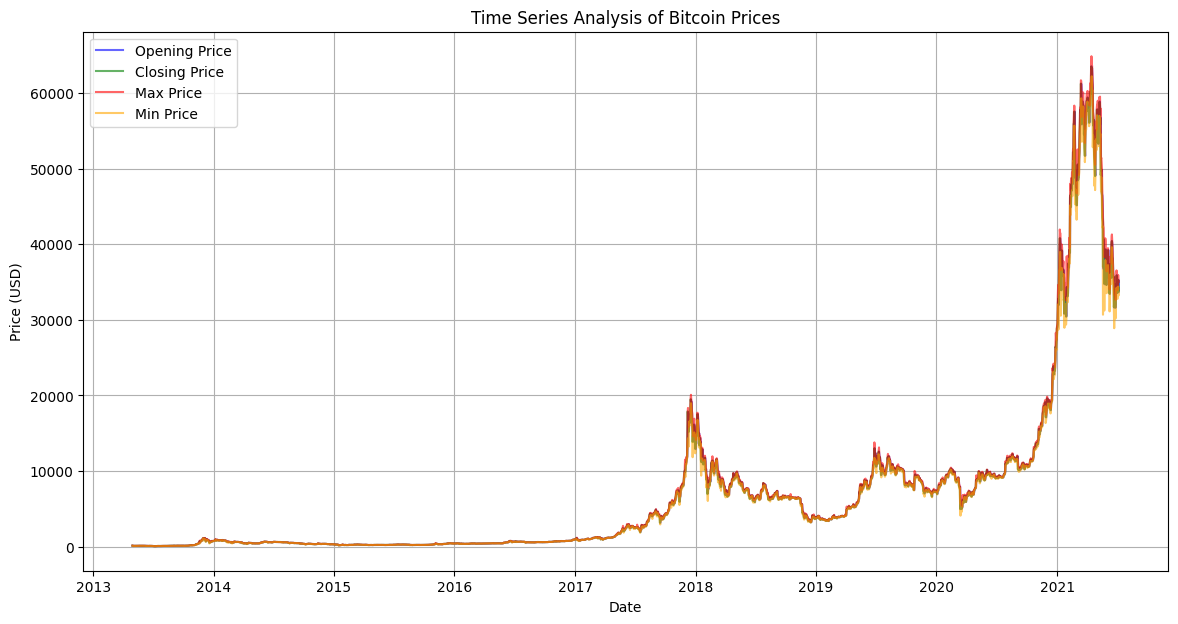

In [7]:
plt.figure(figsize=(14, 7))
# Opening Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Open'], label='Opening Price', color='blue', alpha=0.6)
# Closing Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Closing Price', color='green', alpha=0.6)
# Max Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['High'], label='Max Price', color='red', alpha=0.6)
# Min Price Chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Low'], label='Min Price', color='orange', alpha=0.6)
plt.title('Time Series Analysis of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



<font color = "Yellow">

<a id = "5"></a><br>
## Price Change Rates

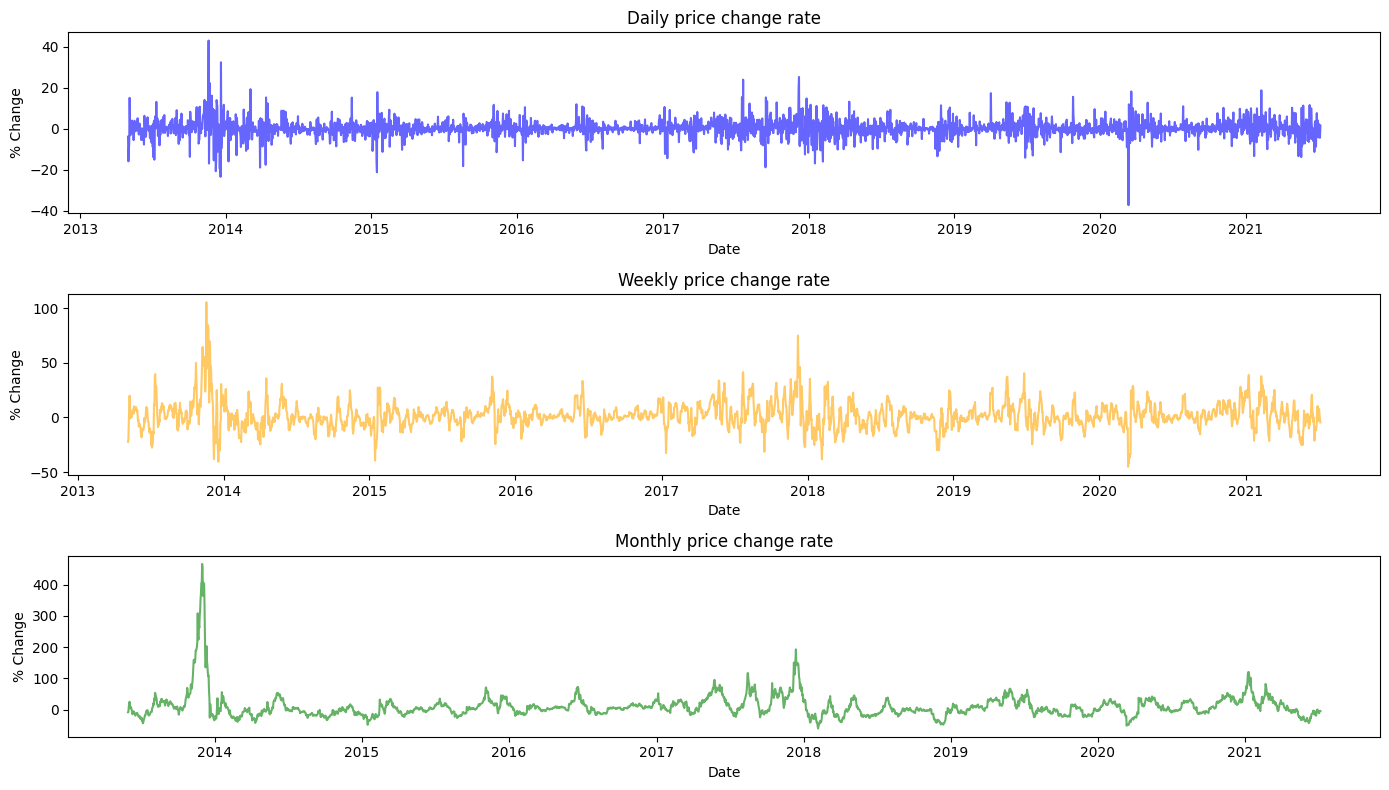

In [8]:
# Daily price change rate
bitcoin_data['Daily Change %'] = bitcoin_data['Close'].pct_change() * 100

# Weekly price change rate (7 days backward)
bitcoin_data['Weekly Change %'] = bitcoin_data['Close'].pct_change(periods=7) * 100

# Monthly price change rate (30 days backward)
bitcoin_data['Monthly Change %'] = bitcoin_data['Close'].pct_change(periods=30) * 100

# Visualizing the results
plt.figure(figsize=(14, 8))
# Daily change
plt.subplot(3, 1, 1)
plt.plot(bitcoin_data['Date'], bitcoin_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Weekly change
plt.subplot(3, 1, 2)
plt.plot(bitcoin_data['Date'], bitcoin_data['Weekly Change %'], color='orange', alpha=0.6)
plt.title('Weekly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Monthly change
plt.subplot(3, 1, 3)
plt.plot(bitcoin_data['Date'], bitcoin_data['Monthly Change %'], color='green', alpha=0.6)
plt.title('Monthly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

plt.tight_layout()
plt.show()

<font color = "Yellow">

<a id = "6"></a><br>
## Volatility Analysis

* Daily price change
* Short-term(7-Day)
* Middle-term(30-day)
* Long-term(90-day)
* Rolling Volatilite

<font color = "Yellow">

<a id = "7"></a><br>
### Daily price change

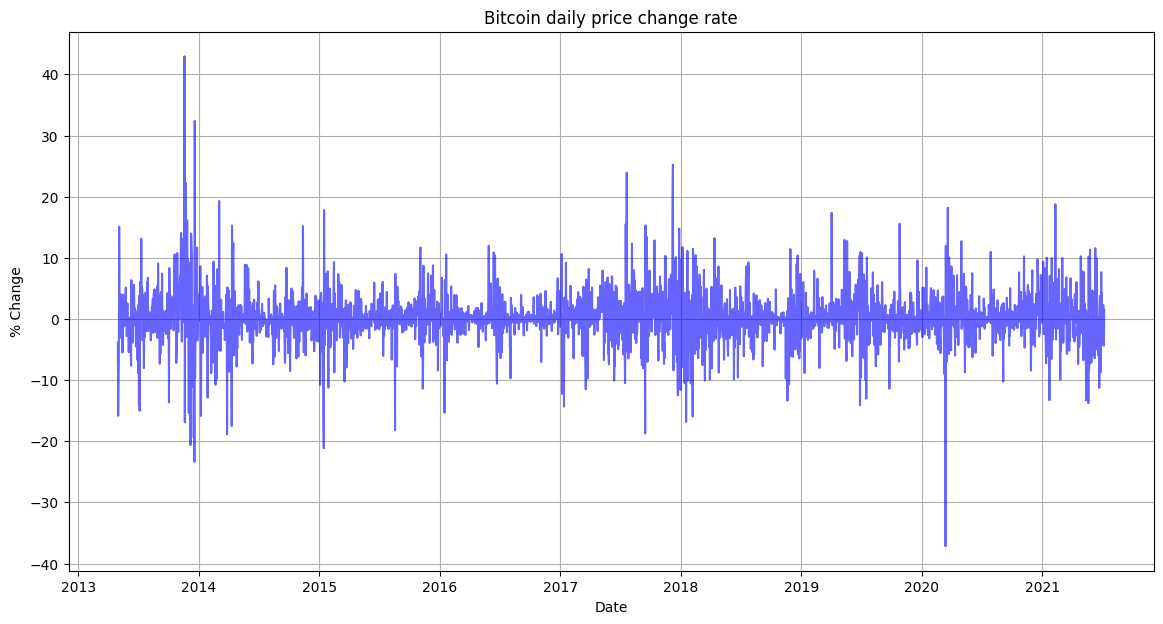

In [9]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

# Calculate the daily price change rate
bitcoin_data['Daily Change %'] = bitcoin_data['Close'].pct_change() * 100

# Visualize the daily price change rate
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Bitcoin daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "8"></a><br>
### Short-Term (7-Day)

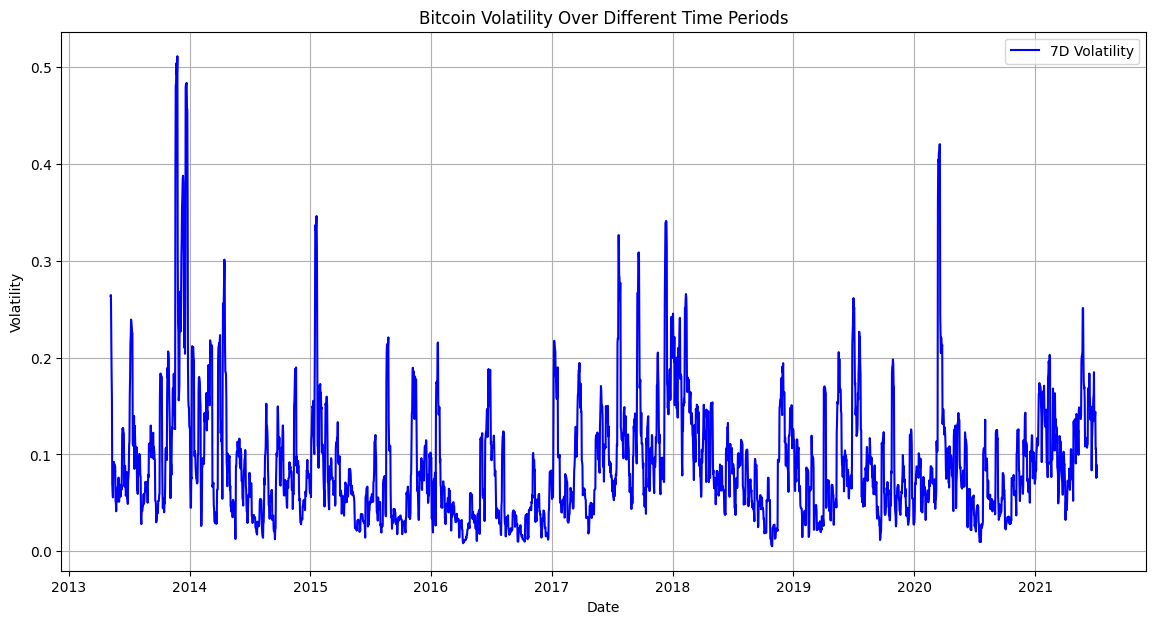

In [10]:
bitcoin_data['7D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['7D Volatility'], label='7D Volatility', color='blue')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "9"></a><br>
### Middle-Term(30-Day)

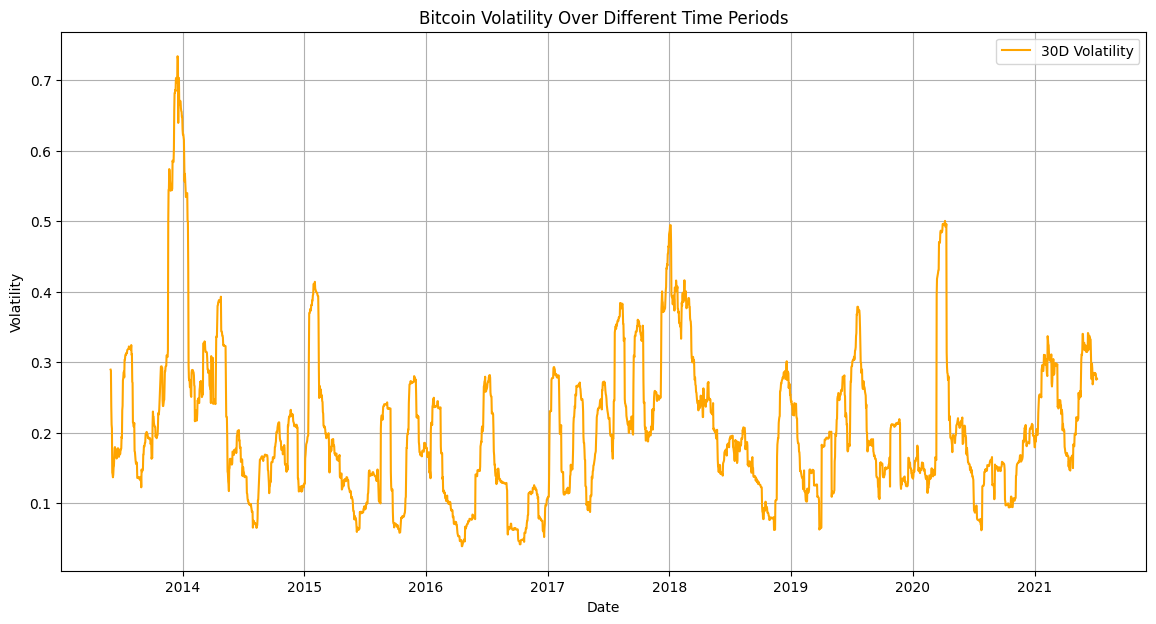

In [11]:
bitcoin_data['30D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=30).std() * np.sqrt(30)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['30D Volatility'], label='30D Volatility', color='orange')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "10"></a><br>
### Long-Term(90-Day)

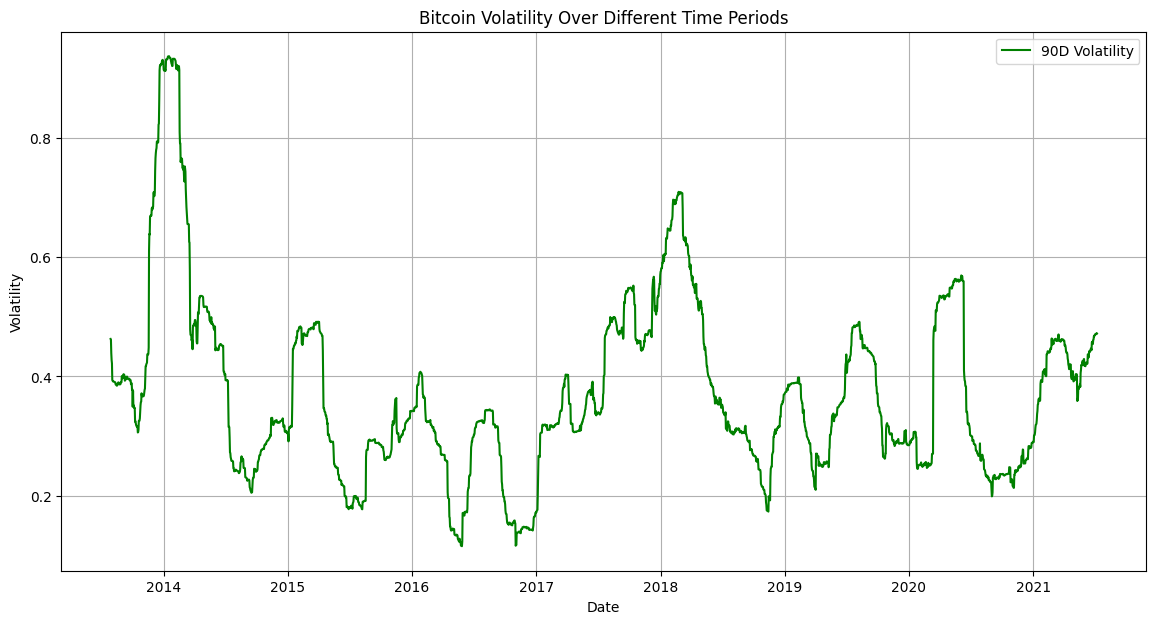

In [12]:
bitcoin_data['90D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=90).std() * np.sqrt(90)
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['90D Volatility'], label='90D Volatility', color='green')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "11"></a><br>
### Compare to Short-term, Middle-term, Long-term

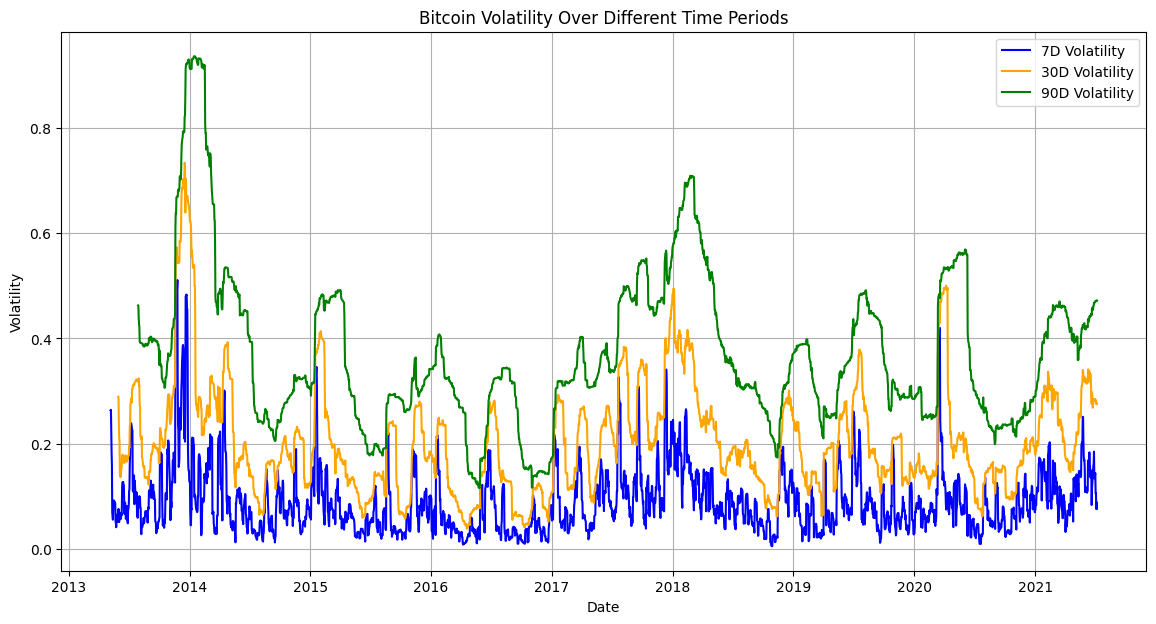

In [13]:
bitcoin_data['7D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)
bitcoin_data['30D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=30).std() * np.sqrt(30)
bitcoin_data['90D Volatility'] = bitcoin_data['Close'].pct_change().rolling(window=90).std() * np.sqrt(90)

plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['7D Volatility'], label='7D Volatility', color='blue')
plt.plot(bitcoin_data['Date'], bitcoin_data['30D Volatility'], label='30D Volatility', color='orange')
plt.plot(bitcoin_data['Date'], bitcoin_data['90D Volatility'], label='90D Volatility', color='green')
plt.title('Bitcoin Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


<font color = "Yellow">

<a id = "12"></a><br>
### Rolling Volatilite

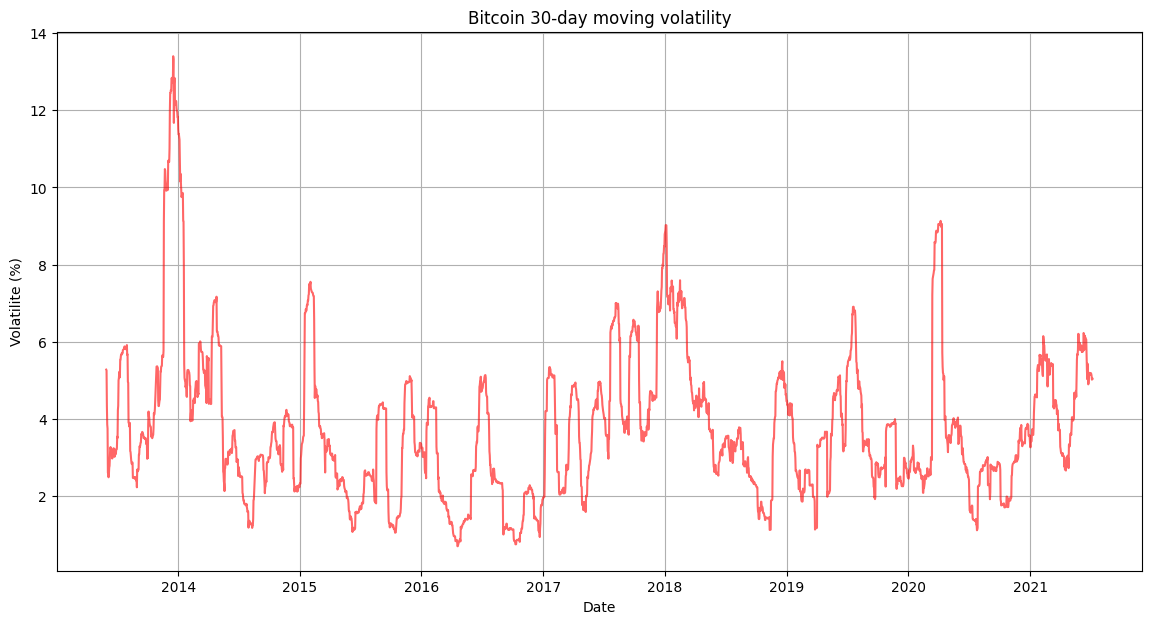

In [14]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

# Calculate the daily price change rate.
bitcoin_data['Daily Change %'] = bitcoin_data['Close'].pct_change() * 100

# Calculate the 30-day moving volatility (standard deviation).
bitcoin_data['Rolling Volatility (30D)'] = bitcoin_data['Daily Change %'].rolling(window=30).std()

# Visualize the moving volatility.
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['Rolling Volatility (30D)'], color='red', alpha=0.6)
plt.title('Bitcoin 30-day moving volatility')
plt.xlabel('Date')
plt.ylabel('Volatilite (%)')
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "13"></a><br>
## Moving Averages
#### * Short-term moving average (SMA-50)
#### * Long-term moving average (SMA-200)

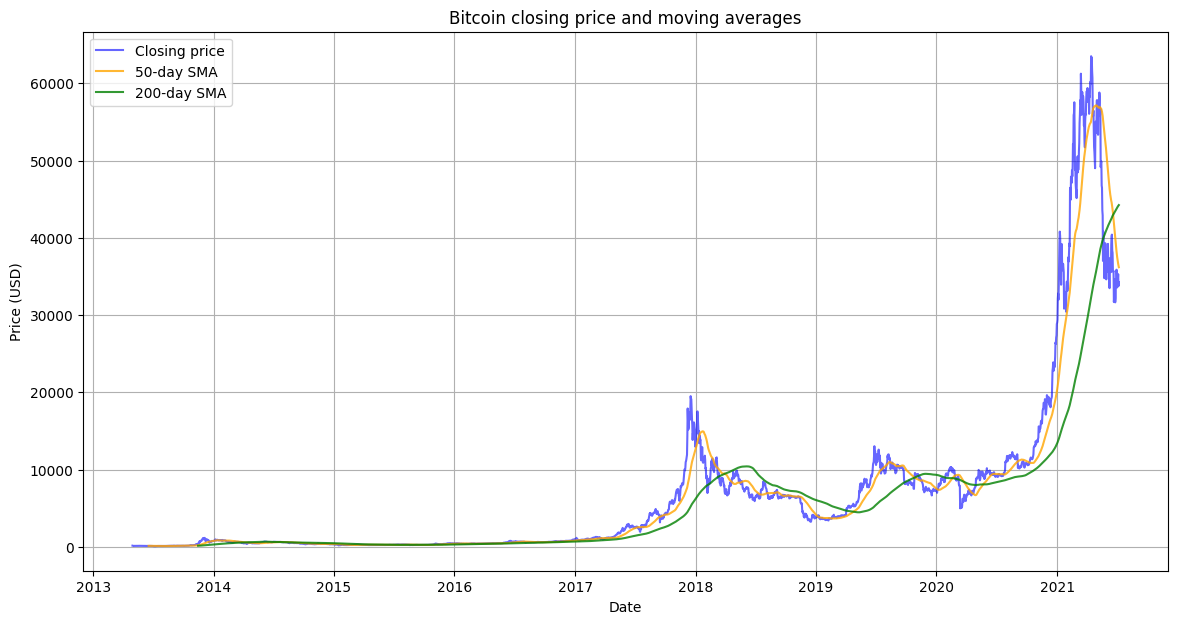

In [15]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.sort_values(by='Date', inplace=True)

# Calculate the 50-day and 200-day simple moving averages.
bitcoin_data['SMA-50'] = bitcoin_data['Close'].rolling(window=50).mean()
bitcoin_data['SMA-200'] = bitcoin_data['Close'].rolling(window=200).mean()

# Visualize the closing prices and moving averages.
plt.figure(figsize=(14, 7))

# Closing price chart
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Closing price', color='blue', alpha=0.6)

# 50-day SMA chart
plt.plot(bitcoin_data['Date'], bitcoin_data['SMA-50'], label='50-day SMA', color='orange', alpha=0.8)

# 200-day SMA chart
plt.plot(bitcoin_data['Date'], bitcoin_data['SMA-200'], label='200-day SMA', color='green', alpha=0.8)

plt.title('Bitcoin closing price and moving averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


<font color = "Yellow">

<a id = "14"></a><br>
## Annual, Monthly, and Weekly Price Trends

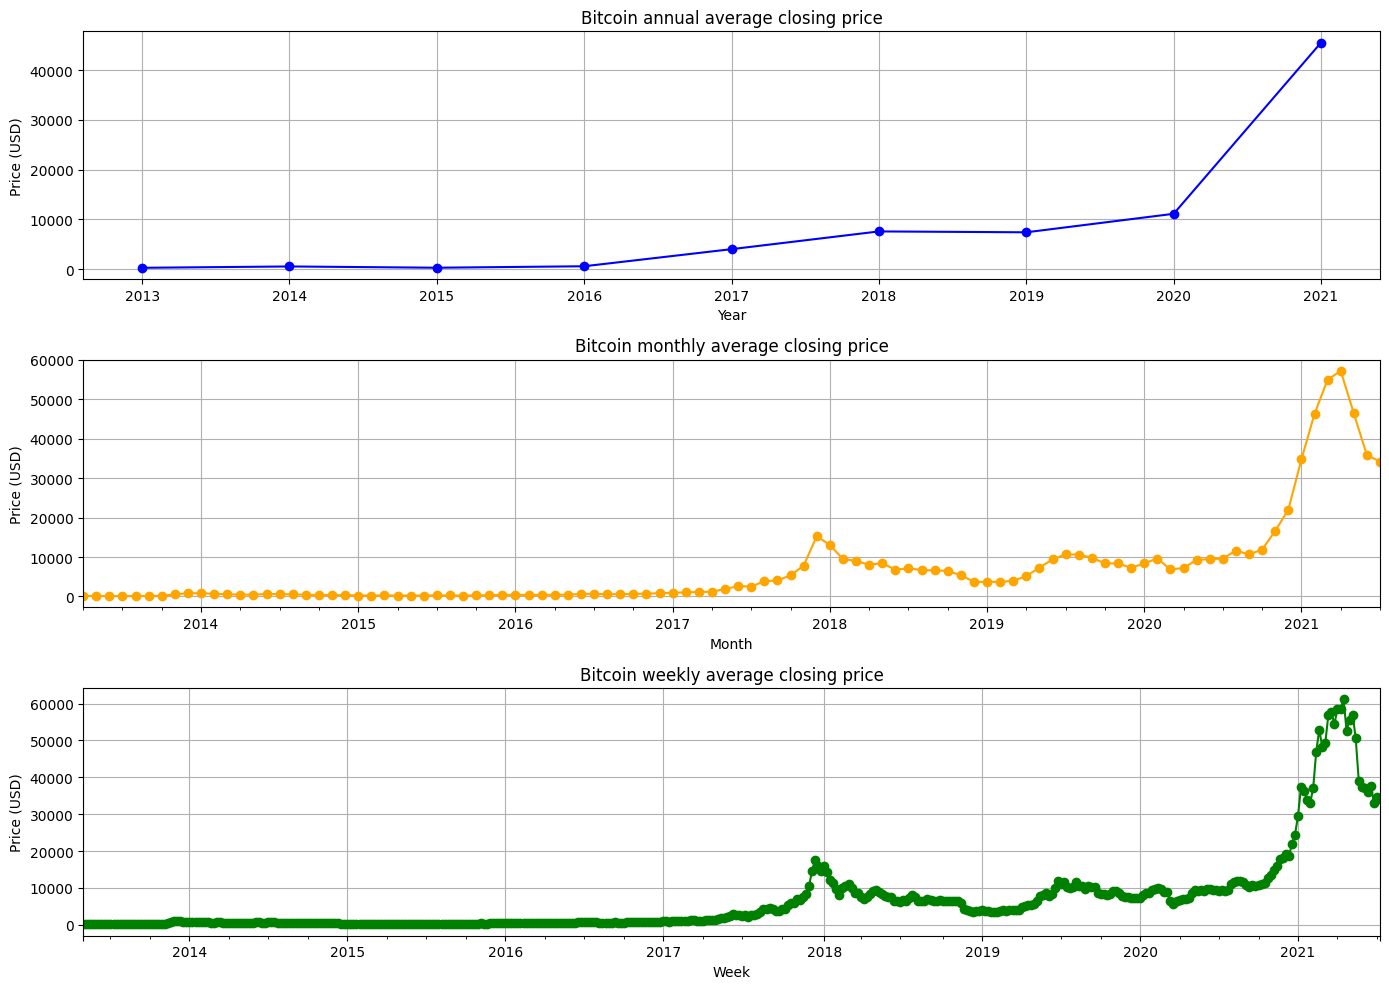

In [16]:
# Convert the 'Date' column to datetime format.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Calculate the annual average closing price.
bitcoin_data['Year'] = bitcoin_data['Date'].dt.year
yearly_trend = bitcoin_data.groupby('Year')['Close'].mean()

# Calculate the monthly average closing price.
bitcoin_data['Month'] = bitcoin_data['Date'].dt.to_period('M')
monthly_trend = bitcoin_data.groupby('Month')['Close'].mean()

# Calculate the weekly average closing price.
bitcoin_data['Week'] = bitcoin_data['Date'].dt.to_period('W')
weekly_trend = bitcoin_data.groupby('Week')['Close'].mean()

# Visualize annual trends
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
yearly_trend.plot(marker='o', color='blue')
plt.title('Bitcoin annual average closing price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualize monthly trends
plt.subplot(3, 1, 2)
monthly_trend.plot(marker='o', color='orange')
plt.title('Bitcoin monthly average closing price')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.grid(True)

# Haftalık trendleri görselleştirme
plt.subplot(3, 1, 3)
weekly_trend.plot(marker='o', color='green')
plt.title('Bitcoin weekly average closing price')
plt.xlabel('Week')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()


<font color = "Yellow">

<a id = "15"></a><br>
## Relationship Between Closing Price and Volume

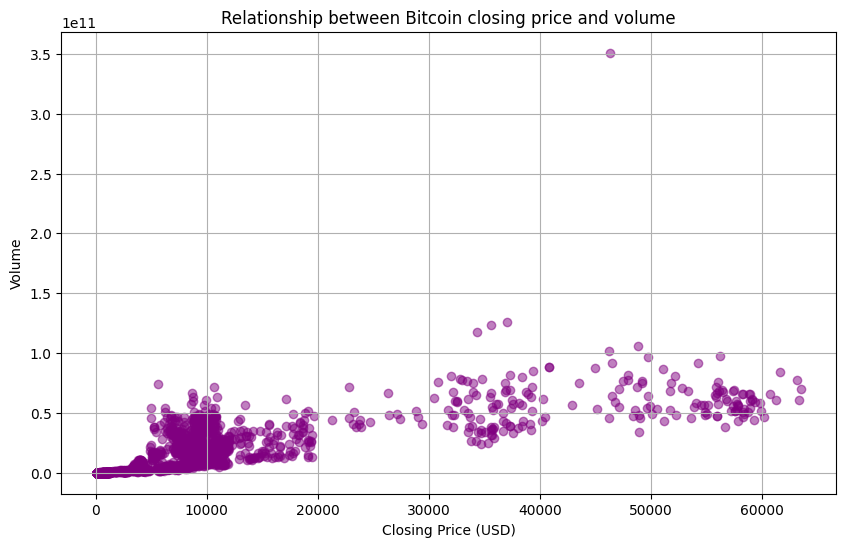

Correlation between closing price and volume: 0.81


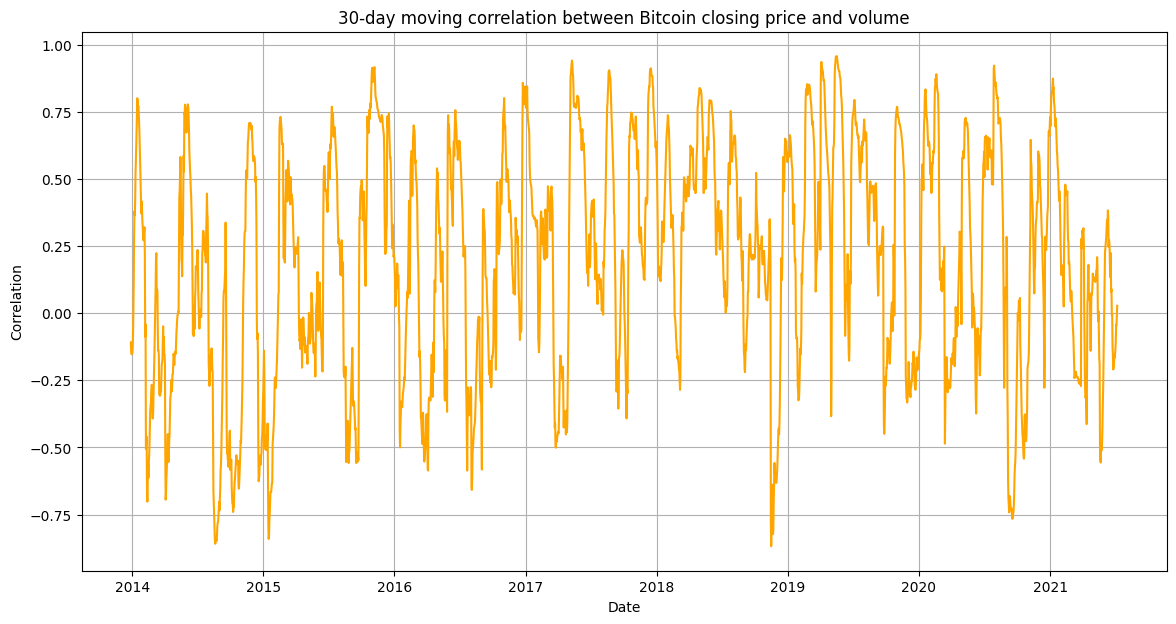

In [17]:
# Convert the 'Date' column to datetime format.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Visualize the relationship between closing price and volume using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(bitcoin_data['Close'], bitcoin_data['Volume'], alpha=0.5, color='purple')
plt.title('Relationship between Bitcoin closing price and volume')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Correlation between closing price and volume
correlation = bitcoin_data['Close'].corr(bitcoin_data['Volume'])
print(f"Correlation between closing price and volume: {correlation:.2f}")

# Calculate and visualize the 30-day moving correlation.
bitcoin_data['Rolling Correlation (30D)'] = bitcoin_data['Close'].rolling(window=30).corr(bitcoin_data['Volume'])

plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['Rolling Correlation (30D)'], color='orange')
plt.title('30-day moving correlation between Bitcoin closing price and volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


<font color = "Yellow">

<a id = "16"></a><br>
## Volume and Market Capitalization
* Relationship between Bitcoin volume and market capitalization
* 30-day moving correlation between Bitcoin volume and market capitalization
    

<font color = "Yellow">

<a id = "17"></a><br>
### Relationship Between Bitcoin Volume and Market Capitalization

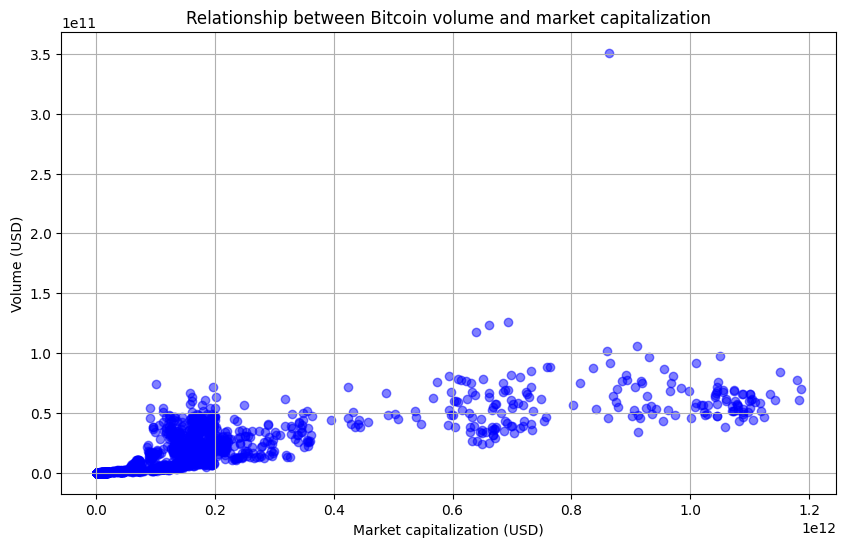

In [18]:
# Convert the 'Date' column to datetime format.
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Visualize the relationship between volume and market capitalization using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(bitcoin_data['Marketcap'], bitcoin_data['Volume'], alpha=0.5, color='blue')
plt.title('Relationship between Bitcoin volume and market capitalization')
plt.xlabel('Market capitalization (USD)')
plt.ylabel('Volume (USD)')
plt.grid(True)
plt.show()


<font color = "Yellow">

<a id = "18"></a><br>
### 30-Day Moving Correlation Between Bitcoin Volume and Market Capitalization

Correlation between volume and market capitalization: 0.81


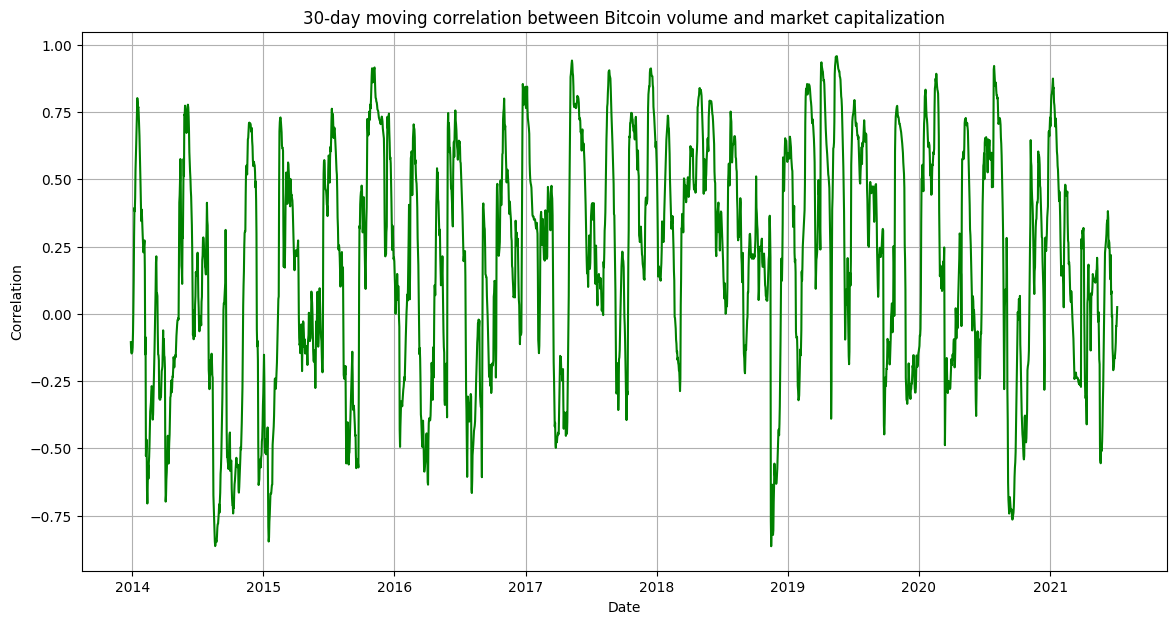

In [19]:
# Correlation between volume and market capitalization
correlation = bitcoin_data['Marketcap'].corr(bitcoin_data['Volume'])
print(f"Correlation between volume and market capitalization: {correlation:.2f}")

# Calculate and visualize the 30-day moving correlation between volume and market capitalization.
bitcoin_data['Rolling Correlation (30D)'] = bitcoin_data['Marketcap'].rolling(window=30).corr(bitcoin_data['Volume'])

plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Date'], bitcoin_data['Rolling Correlation (30D)'], color='green')
plt.title('30-day moving correlation between Bitcoin volume and market capitalization')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

<font color = "Yellow">

<a id = "19"></a><br>
## Analysis of a Specific Period

In [20]:
# Selecting the Relevant Time Period
start_date = '2017-07-01'
end_date = '2018-03-31'
filtered_data = bitcoin_data[(bitcoin_data['Date'] >= start_date) & (bitcoin_data['Date'] <= end_date)]

<font color = "Yellow">

<a id = "20"></a><br>
### Analysis of Price Movements in the Selected Period

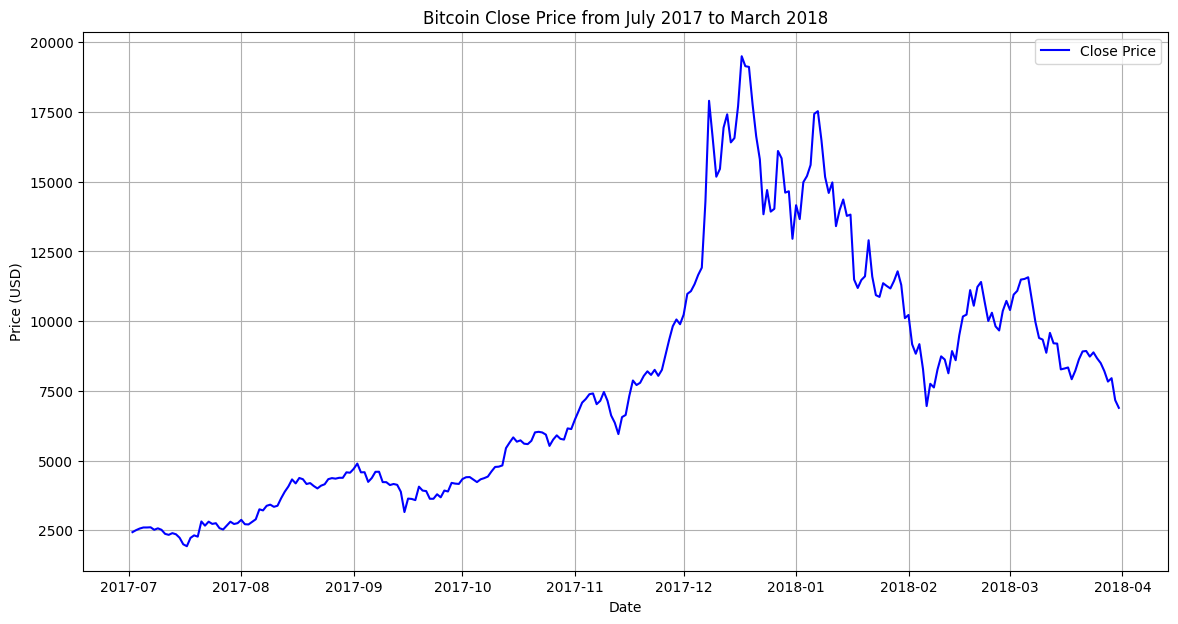

In [21]:
# Close Price Chart for the Selected Period
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], color='blue', label='Close Price')
plt.title('Bitcoin Close Price from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

<font color = "Yellow">

<a id = "21"></a><br>
### Volatility Analysis in the Selected Period

/tmp/ipykernel_18/3352323526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['7D Volatility'] = filtered_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)


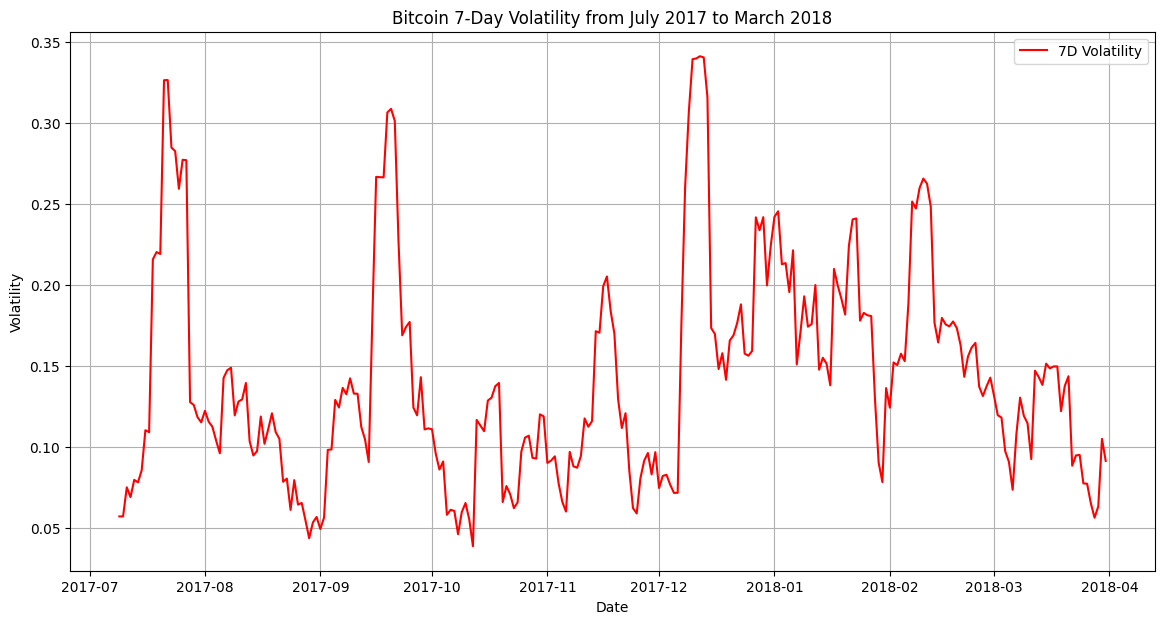

In [22]:
# Calculating 7-Day Rolling Volatility
filtered_data['7D Volatility'] = filtered_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)

# Volatility Graph
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Date'], filtered_data['7D Volatility'], color='red', label='7D Volatility')
plt.title('Bitcoin 7-Day Volatility from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()


<font color = "Yellow">

<a id = "22"></a><br>
### Price and Volatility Relationship in the Selected Period

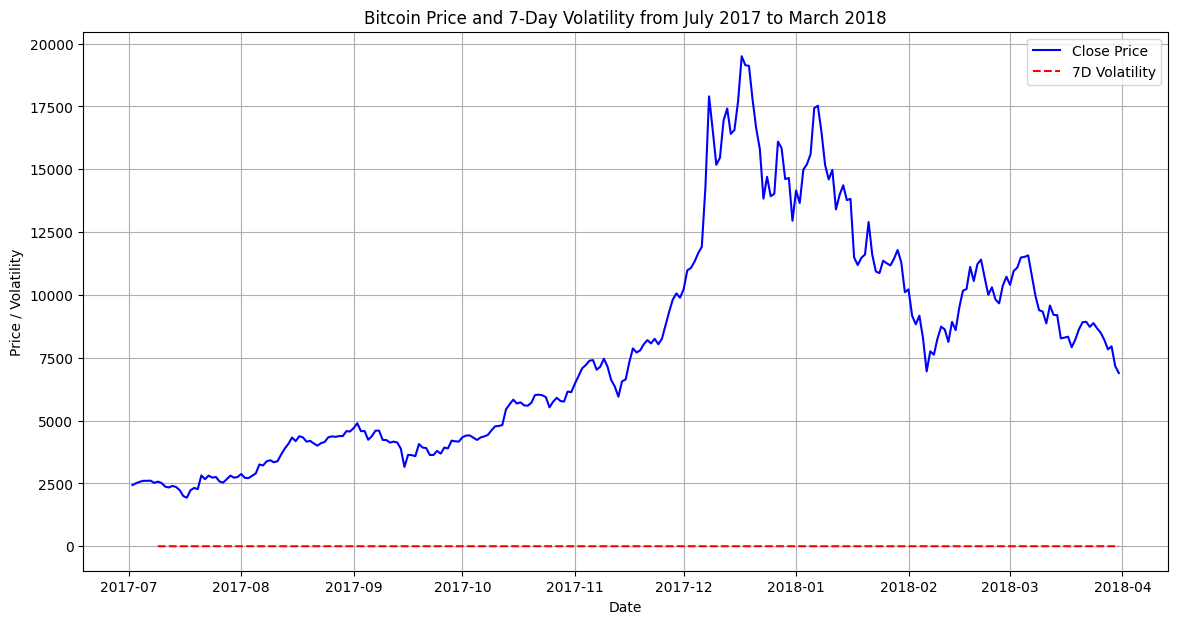

In [23]:
# Price and Volatility Chart
plt.figure(figsize=(14, 7))
plt.plot(filtered_data['Date'], filtered_data['Close'], color='blue', label='Close Price')
plt.plot(filtered_data['Date'], filtered_data['7D Volatility'], color='red', label='7D Volatility', linestyle='--')
plt.title('Bitcoin Price and 7-Day Volatility from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.grid(True)
plt.legend()
plt.show()


<font color = "Orange">

# **ETHEREUM**

<font color = "Orange">

<a id = "23"></a><br>
## Load and Check Data

In [24]:
ethereum_data = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv')

In [25]:
ethereum_data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [26]:
ethereum_data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [27]:
ethereum_data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


<font color = "Orange">

<a id = "24"></a><br>
## Time Series Trend

In [28]:
#Convert the 'Date' column to datetime format and sort the dataset by date.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])
ethereum_data.sort_values(by='Date', inplace=True)

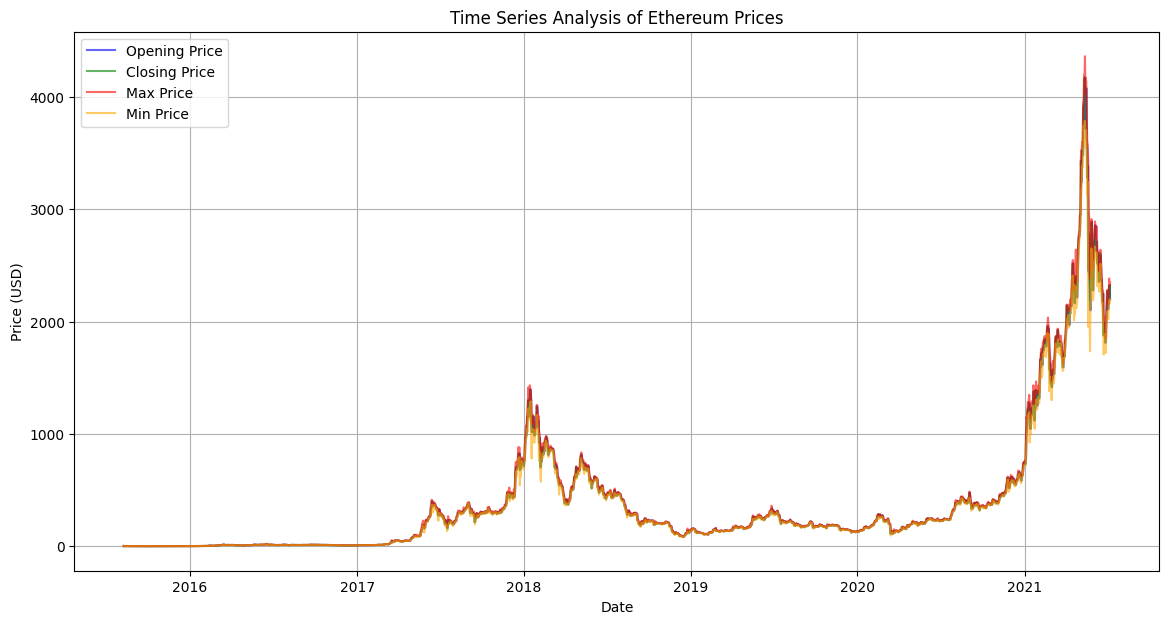

In [29]:
plt.figure(figsize=(14, 7))
# Opening Price Chart
plt.plot(ethereum_data['Date'], ethereum_data['Open'], label='Opening Price', color='blue', alpha=0.6)
# Closing Price Chart
plt.plot(ethereum_data['Date'], ethereum_data['Close'], label='Closing Price', color='green', alpha=0.6)
# Max Price Chart
plt.plot(ethereum_data['Date'], ethereum_data['High'], label='Max Price', color='red', alpha=0.6)
# Min Price Chart
plt.plot(ethereum_data['Date'], ethereum_data['Low'], label='Min Price', color='orange', alpha=0.6)
plt.title('Time Series Analysis of Ethereum Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


<font color = "Orange">

<a id = "25"></a><br>
## Price Change Rates

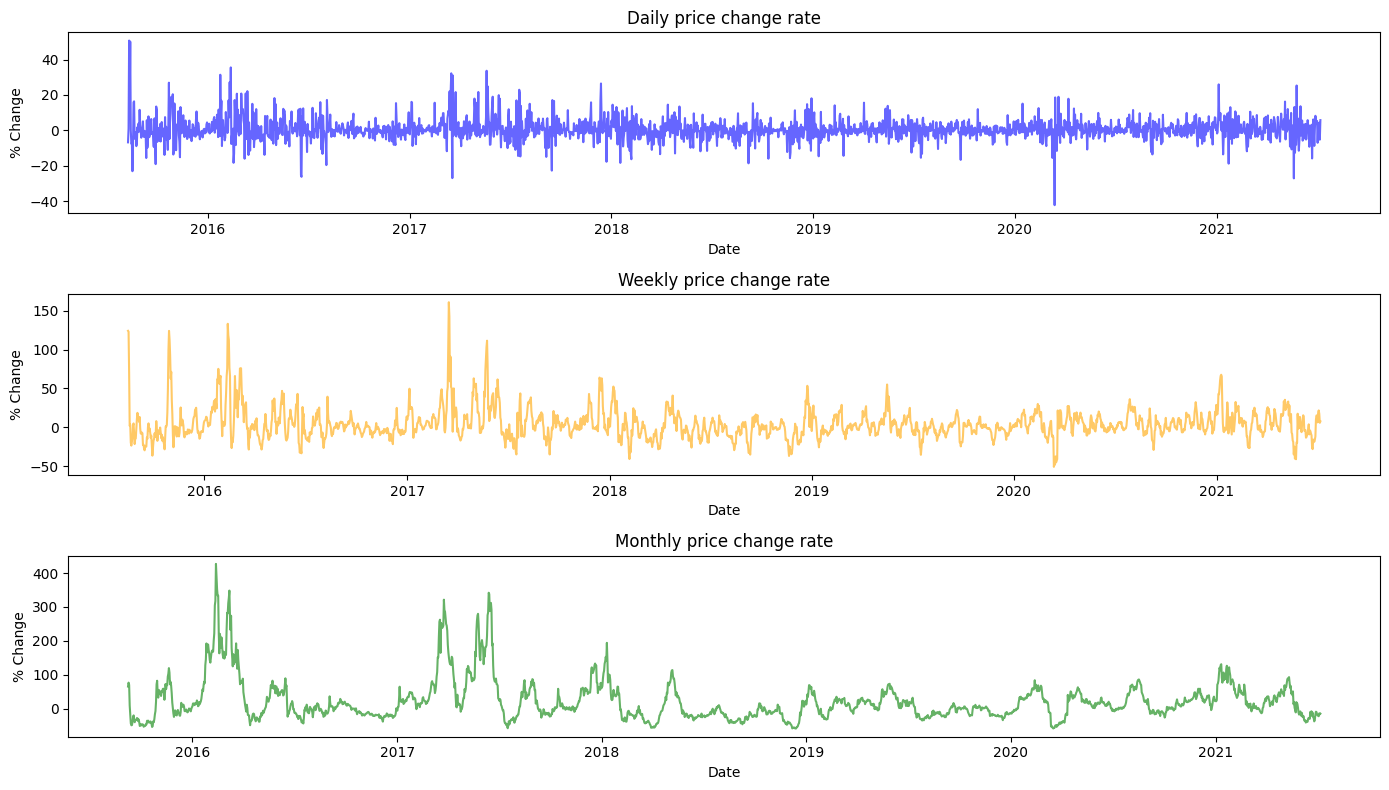

In [30]:
# Daily price change rate
ethereum_data['Daily Change %'] = ethereum_data['Close'].pct_change() * 100

# Weekly price change rate (7 days backward)
ethereum_data['Weekly Change %'] = ethereum_data['Close'].pct_change(periods=7) * 100

# Monthly price change rate (30 days backward)
ethereum_data['Monthly Change %'] = ethereum_data['Close'].pct_change(periods=30) * 100

# Visualizing the results
plt.figure(figsize=(14, 8))
# Daily change
plt.subplot(3, 1, 1)
plt.plot(ethereum_data['Date'], ethereum_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Weekly change
plt.subplot(3, 1, 2)
plt.plot(ethereum_data['Date'], ethereum_data['Weekly Change %'], color='orange', alpha=0.6)
plt.title('Weekly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

# Monthly change
plt.subplot(3, 1, 3)
plt.plot(ethereum_data['Date'], ethereum_data['Monthly Change %'], color='green', alpha=0.6)
plt.title('Monthly price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')

plt.tight_layout()
plt.show()

<font color = "Orange">

<a id = "26"></a><br>
## Volatility Analysis

* Daily price change
* Short-term(7-Day)
* Middle-term(30-day)
* Long-term(90-day)
* Rolling Volatilite

<font color = "Orange">

<a id = "27"></a><br>
### Daily price change

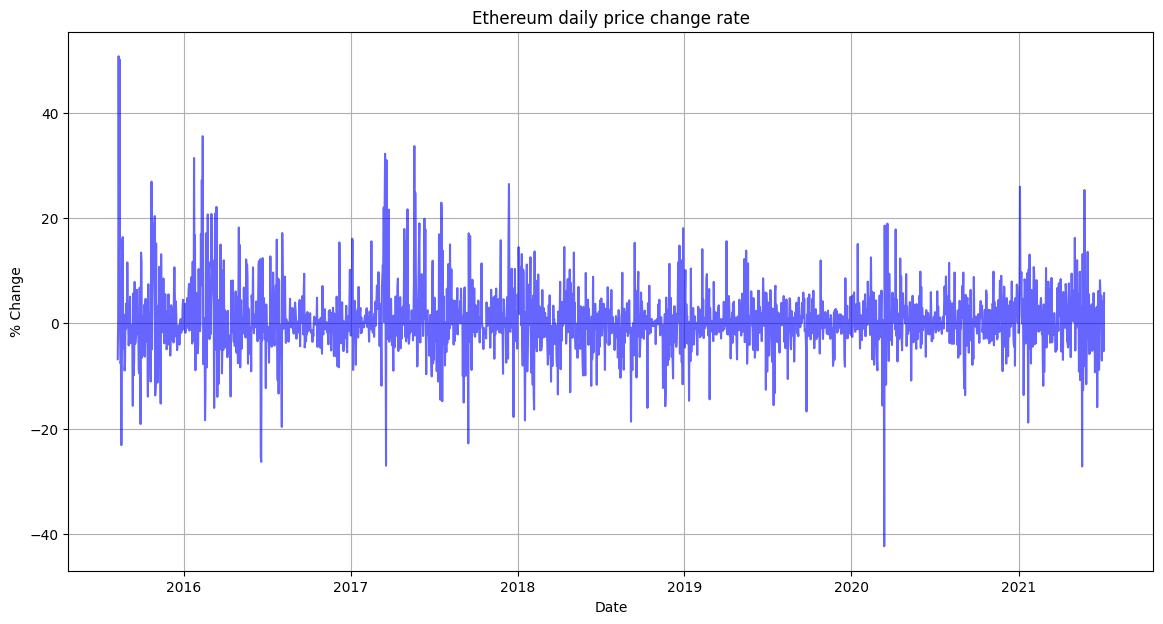

In [31]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])
ethereum_data.sort_values(by='Date', inplace=True)

# Calculate the daily price change rate
ethereum_data['Daily Change %'] = ethereum_data['Close'].pct_change() * 100

# Visualize the daily price change rate
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['Daily Change %'], color='blue', alpha=0.6)
plt.title('Ethereum daily price change rate')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "28"></a><br>
### Short-Term (7-Day)

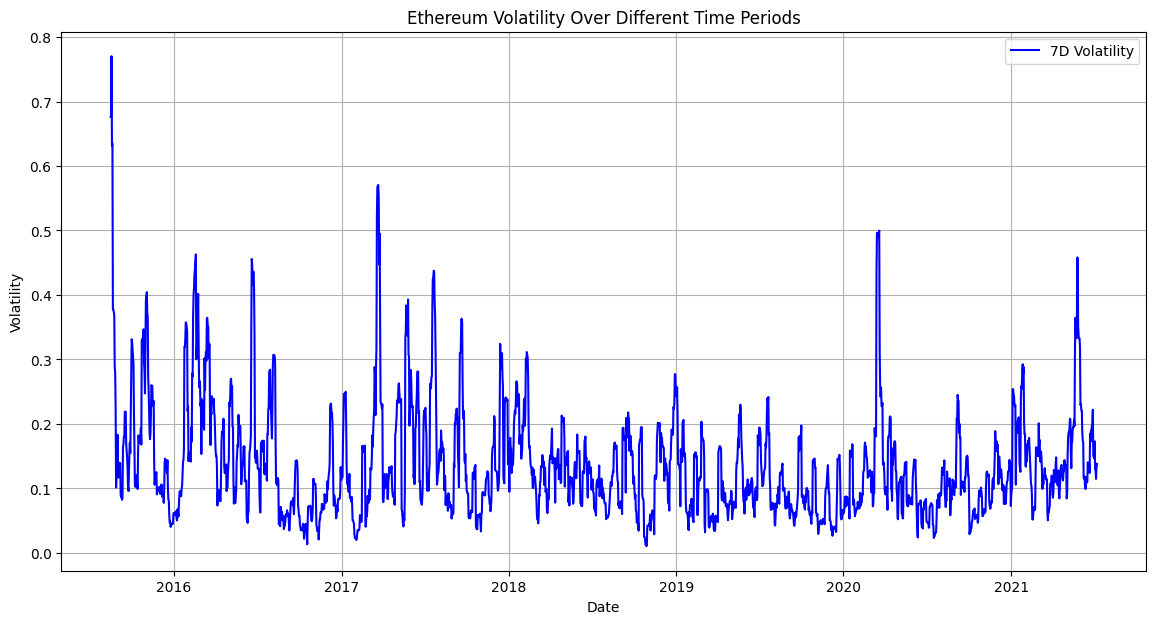

In [32]:
ethereum_data['7D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['7D Volatility'], label='7D Volatility', color='blue')
plt.title('Ethereum Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "29"></a><br>
### Middle-Term(30-Day)

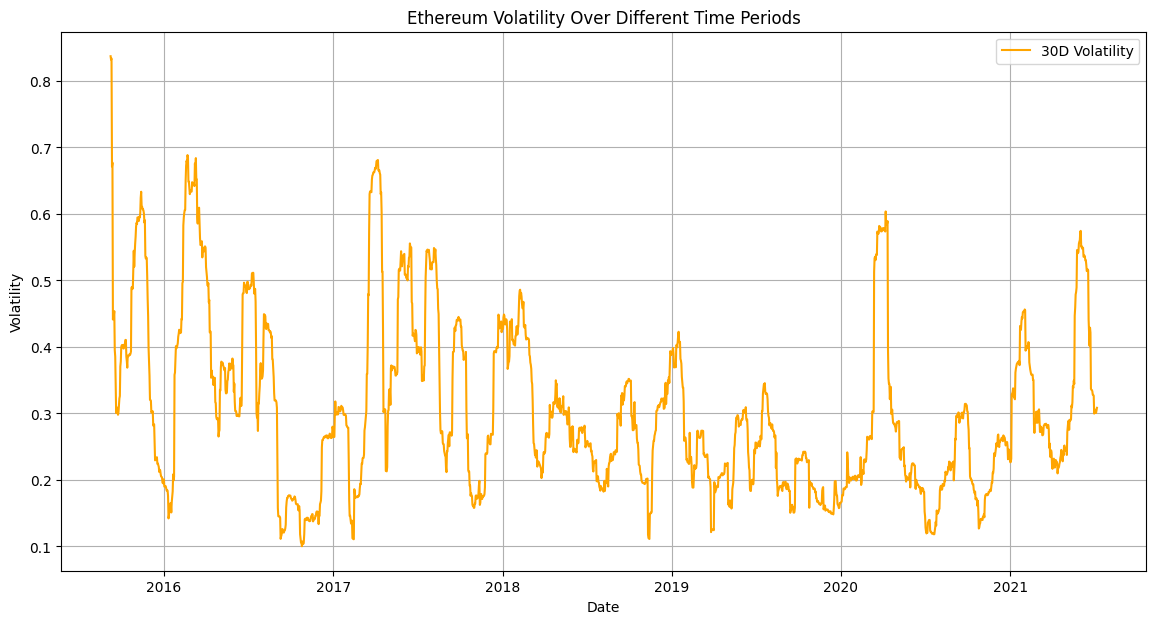

In [33]:
ethereum_data['30D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=30).std() * np.sqrt(30)
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['30D Volatility'], label='30D Volatility', color='orange')
plt.title('Ethereum Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "30"></a><br>
### Long-Term(90-Day)

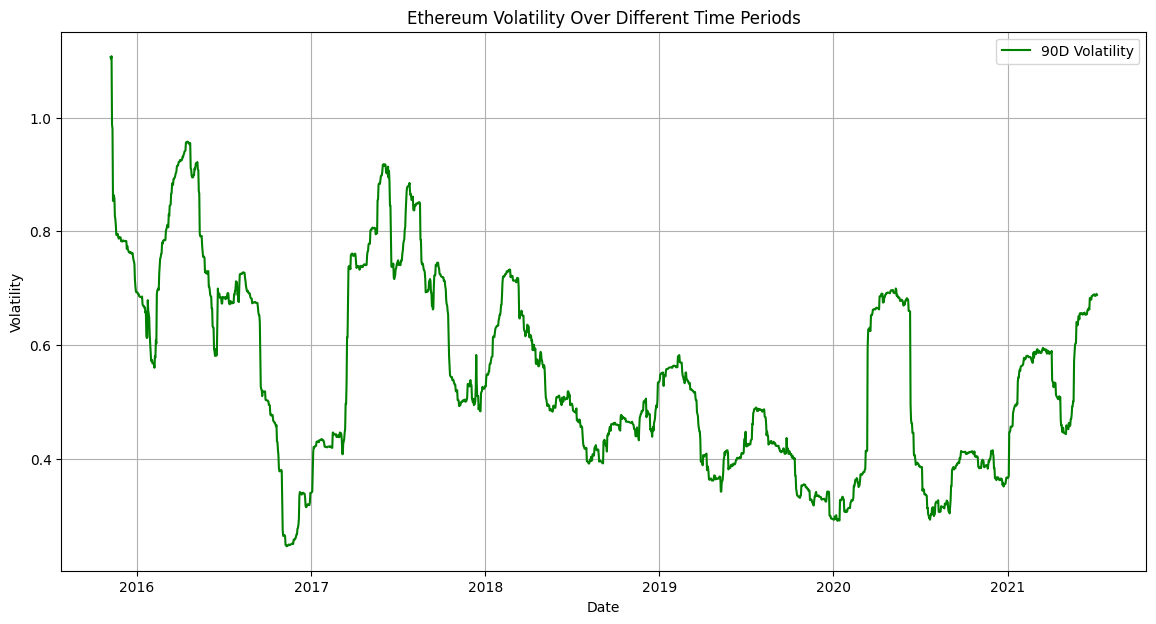

In [34]:
ethereum_data['90D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=90).std() * np.sqrt(90)
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['90D Volatility'], label='90D Volatility', color='green')
plt.title('Ethereum Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "31"></a><br>
### Compare to Short-term, Middle-term, Long-term

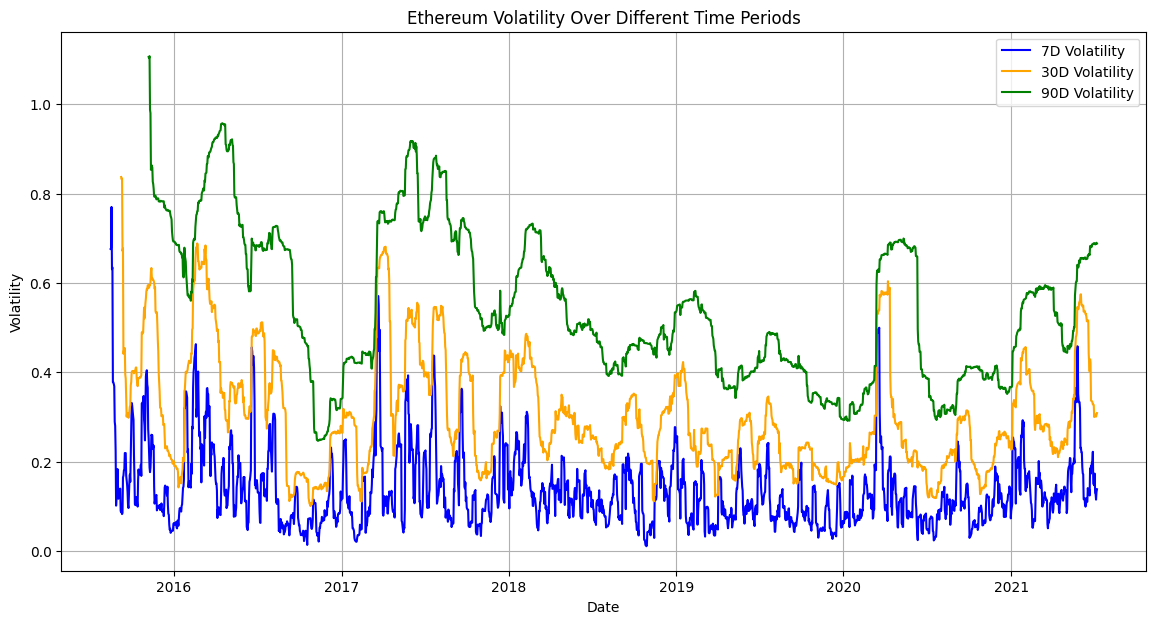

In [35]:
ethereum_data['7D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)
ethereum_data['30D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=30).std() * np.sqrt(30)
ethereum_data['90D Volatility'] = ethereum_data['Close'].pct_change().rolling(window=90).std() * np.sqrt(90)

plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['7D Volatility'], label='7D Volatility', color='blue')
plt.plot(ethereum_data['Date'], ethereum_data['30D Volatility'], label='30D Volatility', color='orange')
plt.plot(ethereum_data['Date'], ethereum_data['90D Volatility'], label='90D Volatility', color='green')
plt.title('Ethereum Volatility Over Different Time Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "32"></a><br>
### Rolling Volatilite

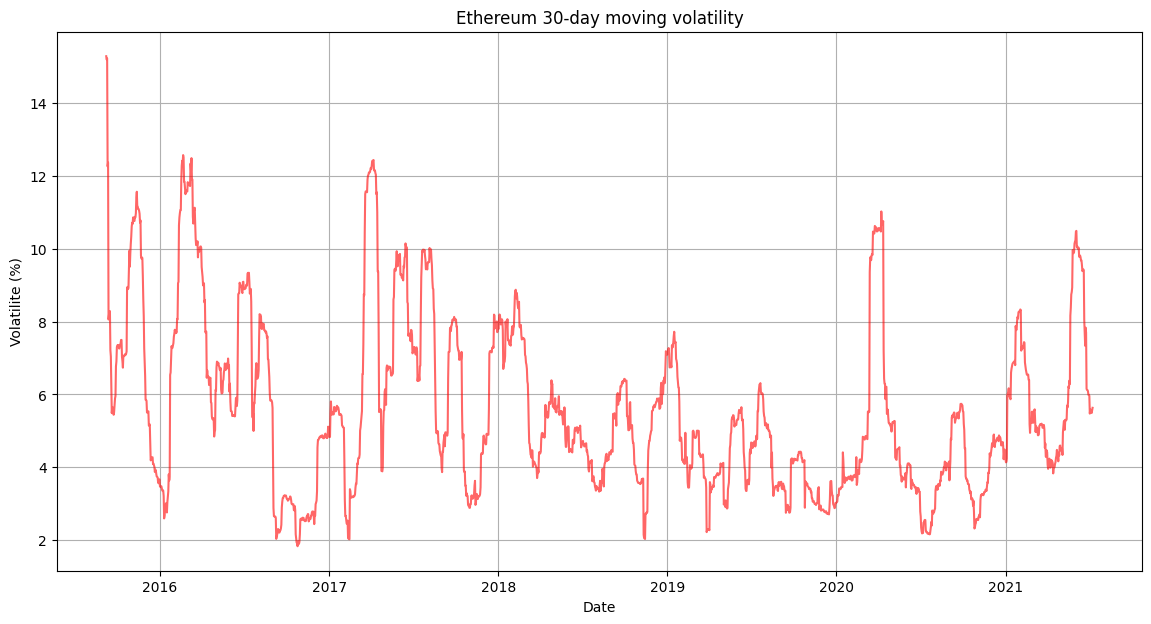

In [36]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])
ethereum_data.sort_values(by='Date', inplace=True)

# Calculate the daily price change rate.
ethereum_data['Daily Change %'] = ethereum_data['Close'].pct_change() * 100

# Calculate the 30-day moving volatility (standard deviation).
ethereum_data['Rolling Volatility (30D)'] = ethereum_data['Daily Change %'].rolling(window=30).std()

# Visualize the moving volatility.
plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['Rolling Volatility (30D)'], color='red', alpha=0.6)
plt.title('Ethereum 30-day moving volatility')
plt.xlabel('Date')
plt.ylabel('Volatilite (%)')
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "33"></a><br>
## Moving Averages
#### * Short-term moving average (SMA-50)
#### * Long-term moving average (SMA-200)

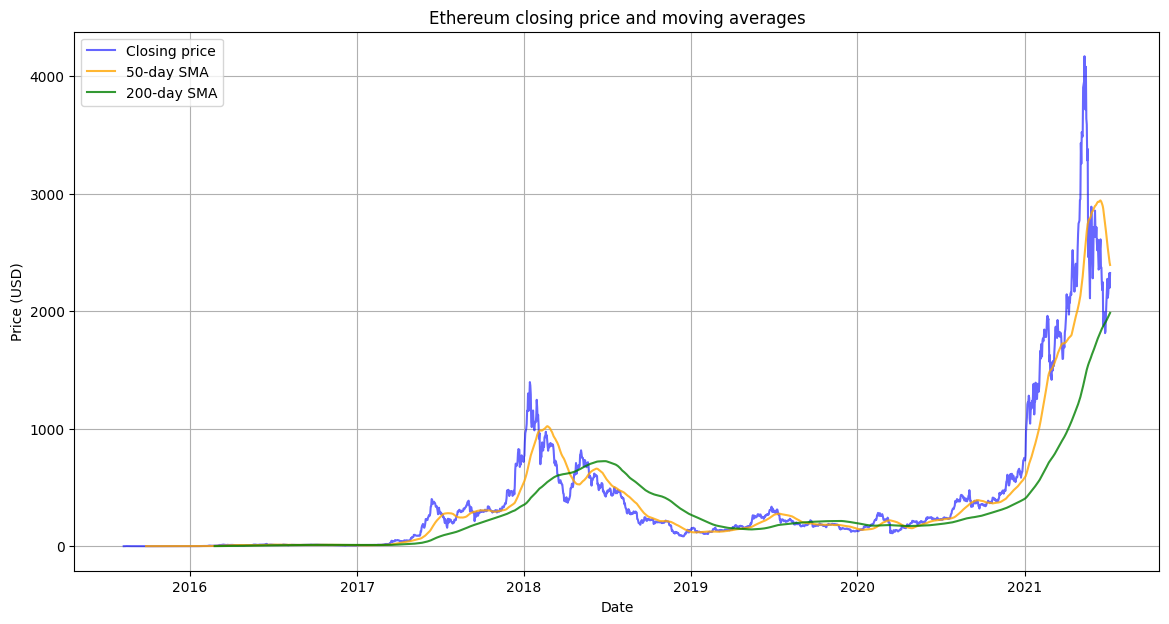

In [37]:
# Convert the 'Date' column to datetime format and sort the dataset by date.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])
ethereum_data.sort_values(by='Date', inplace=True)

# Calculate the 50-day and 200-day simple moving averages.
ethereum_data['SMA-50'] = ethereum_data['Close'].rolling(window=50).mean()
ethereum_data['SMA-200'] = ethereum_data['Close'].rolling(window=200).mean()

# Visualize the closing prices and moving averages.
plt.figure(figsize=(14, 7))

# Closing price chart
plt.plot(ethereum_data['Date'], ethereum_data['Close'], label='Closing price', color='blue', alpha=0.6)

# 50-day SMA chart
plt.plot(ethereum_data['Date'], ethereum_data['SMA-50'], label='50-day SMA', color='orange', alpha=0.8)

# 200-day SMA chart
plt.plot(ethereum_data['Date'], ethereum_data['SMA-200'], label='200-day SMA', color='green', alpha=0.8)

plt.title('Ethereum closing price and moving averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


<font color = "Orange">

<a id = "34"></a><br>
## Annual, Monthly, and Weekly Price Trends

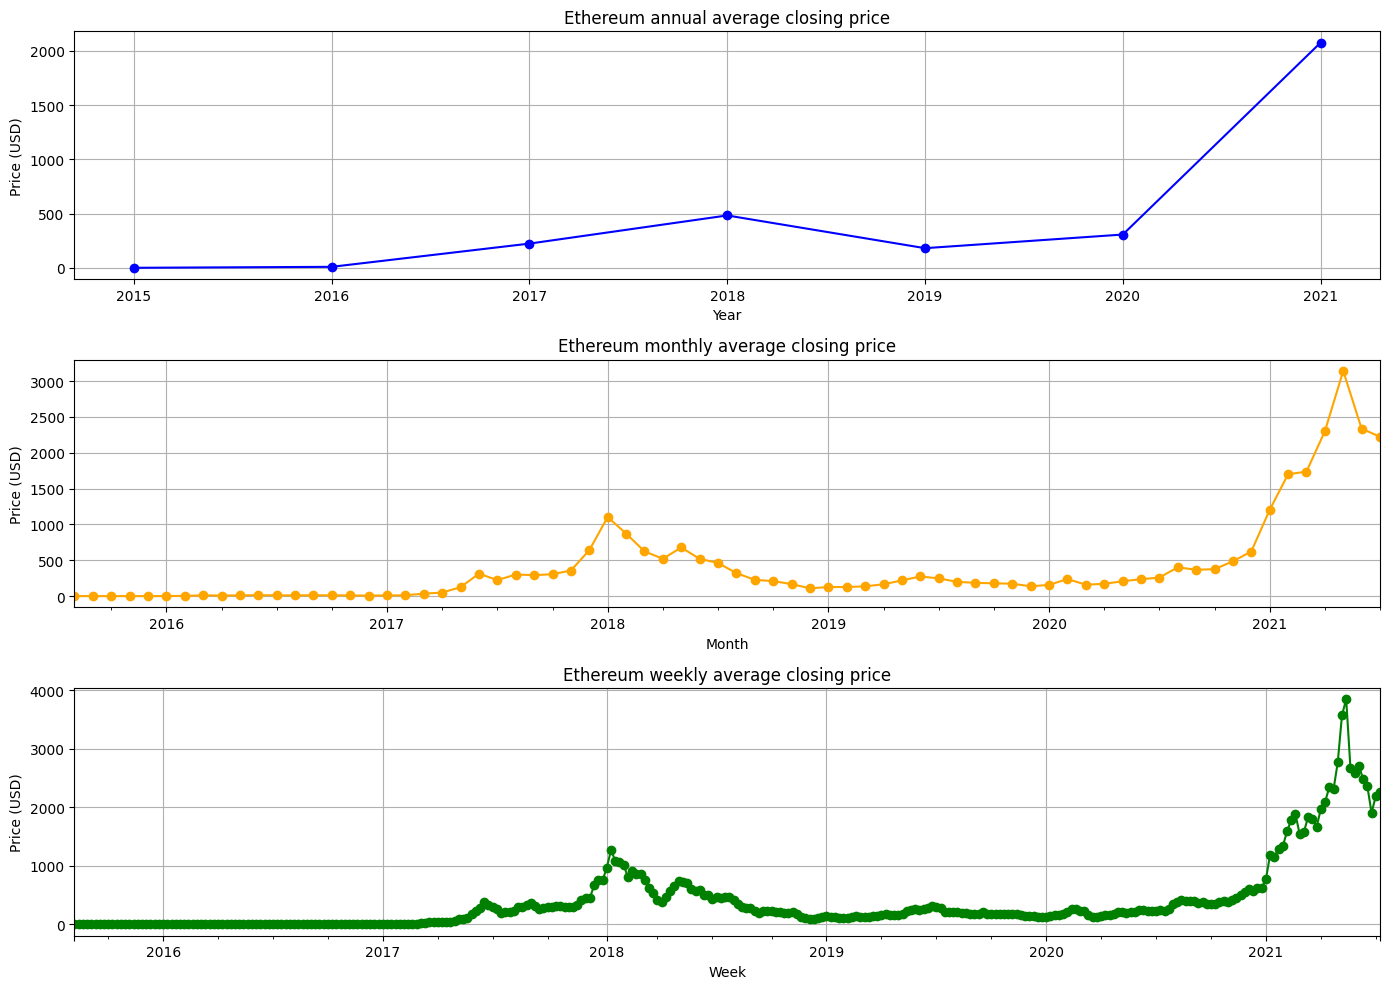

In [38]:
# Convert the 'Date' column to datetime format.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Calculate the annual average closing price.
ethereum_data['Year'] = ethereum_data['Date'].dt.year
yearly_trend = ethereum_data.groupby('Year')['Close'].mean()

# Calculate the monthly average closing price.
ethereum_data['Month'] = ethereum_data['Date'].dt.to_period('M')
monthly_trend = ethereum_data.groupby('Month')['Close'].mean()

# Calculate the weekly average closing price.
ethereum_data['Week'] = ethereum_data['Date'].dt.to_period('W')
weekly_trend = ethereum_data.groupby('Week')['Close'].mean()

# Visualize annual trends
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
yearly_trend.plot(marker='o', color='blue')
plt.title('Ethereum annual average closing price')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)

# Visualize monthly trends
plt.subplot(3, 1, 2)
monthly_trend.plot(marker='o', color='orange')
plt.title('Ethereum monthly average closing price')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.grid(True)

# Haftalık trendleri görselleştirme
plt.subplot(3, 1, 3)
weekly_trend.plot(marker='o', color='green')
plt.title('Ethereum weekly average closing price')
plt.xlabel('Week')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

<font color = "Orange">

<a id = "35"></a><br>
## Relationship Between Closing Price and Volume

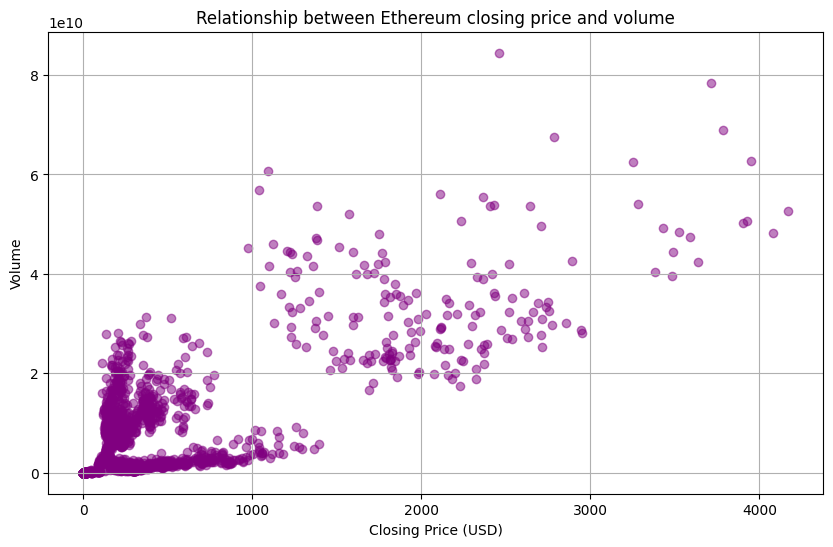

Correlation between closing price and volume: 0.77


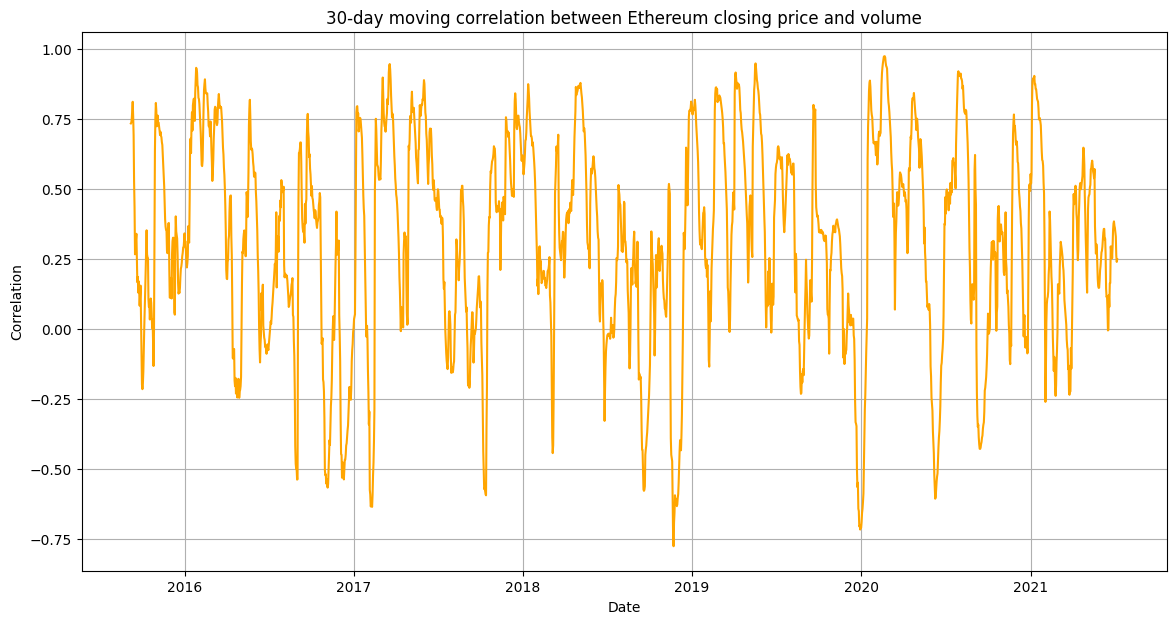

In [39]:
# Convert the 'Date' column to datetime format.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Visualize the relationship between closing price and volume using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(ethereum_data['Close'], ethereum_data['Volume'], alpha=0.5, color='purple')
plt.title('Relationship between Ethereum closing price and volume')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Correlation between closing price and volume
correlation = ethereum_data['Close'].corr(ethereum_data['Volume'])
print(f"Correlation between closing price and volume: {correlation:.2f}")

# Calculate and visualize the 30-day moving correlation.
ethereum_data['Rolling Correlation (30D)'] = ethereum_data['Close'].rolling(window=30).corr(ethereum_data['Volume'])

plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['Rolling Correlation (30D)'], color='orange')
plt.title('30-day moving correlation between Ethereum closing price and volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "36"></a><br>
## Volume and Market Capitalization
* Relationship between Ethereum volume and market capitalization
* 30-day moving correlation between Ethereum volume and market capitalization
    

<font color = "Orange">

<a id = "37"></a><br>
### Relationship between Ethereum volume and market capitalization

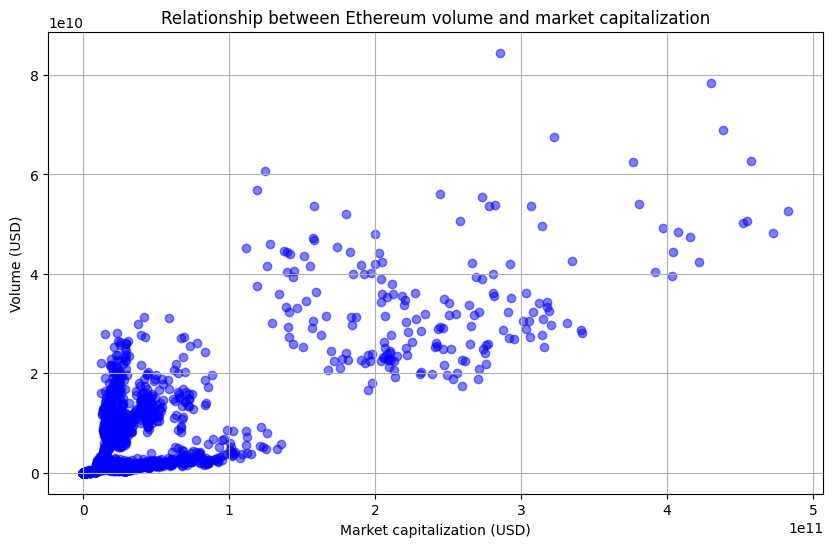

In [40]:
# Convert the 'Date' column to datetime format.
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Visualize the relationship between volume and market capitalization using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(ethereum_data['Marketcap'], ethereum_data['Volume'], alpha=0.5, color='blue')
plt.title('Relationship between Ethereum volume and market capitalization')
plt.xlabel('Market capitalization (USD)')
plt.ylabel('Volume (USD)')
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "38"></a><br>
### 30-day moving correlation between Ethereum volume and market capitalization

Correlation between volume and market capitalization: 0.79


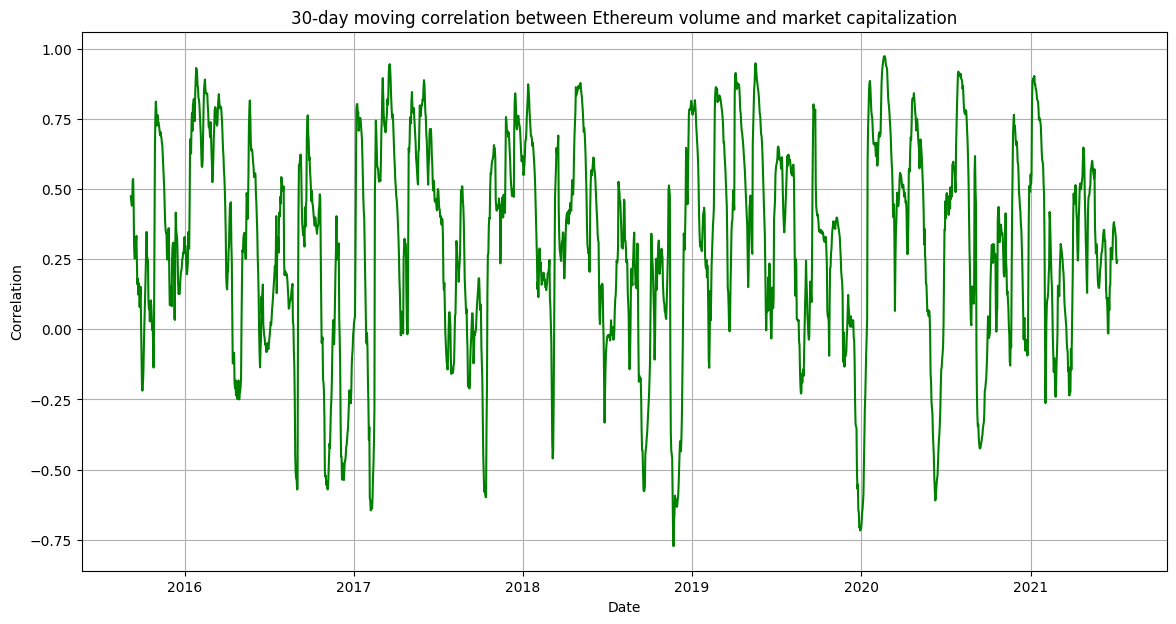

In [41]:
# Correlation between volume and market capitalization
correlation = ethereum_data['Marketcap'].corr(ethereum_data['Volume'])
print(f"Correlation between volume and market capitalization: {correlation:.2f}")

# Calculate and visualize the 30-day moving correlation between volume and market capitalization.
ethereum_data['Rolling Correlation (30D)'] = ethereum_data['Marketcap'].rolling(window=30).corr(ethereum_data['Volume'])

plt.figure(figsize=(14, 7))
plt.plot(ethereum_data['Date'], ethereum_data['Rolling Correlation (30D)'], color='green')
plt.title('30-day moving correlation between Ethereum volume and market capitalization')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

<font color = "Orange">

<a id = "39"></a><br>
## Analysis of a Specific Period

In [42]:
# Selecting the Relevant Time Period
start_date = '2017-07-01'
end_date = '2018-03-31'
filtered_data1 = ethereum_data[(ethereum_data['Date'] >= start_date) & (ethereum_data['Date'] <= end_date)]

<font color = "Orange">

<a id = "40"></a><br>
### Analysis of Price Movements in the Selected Period

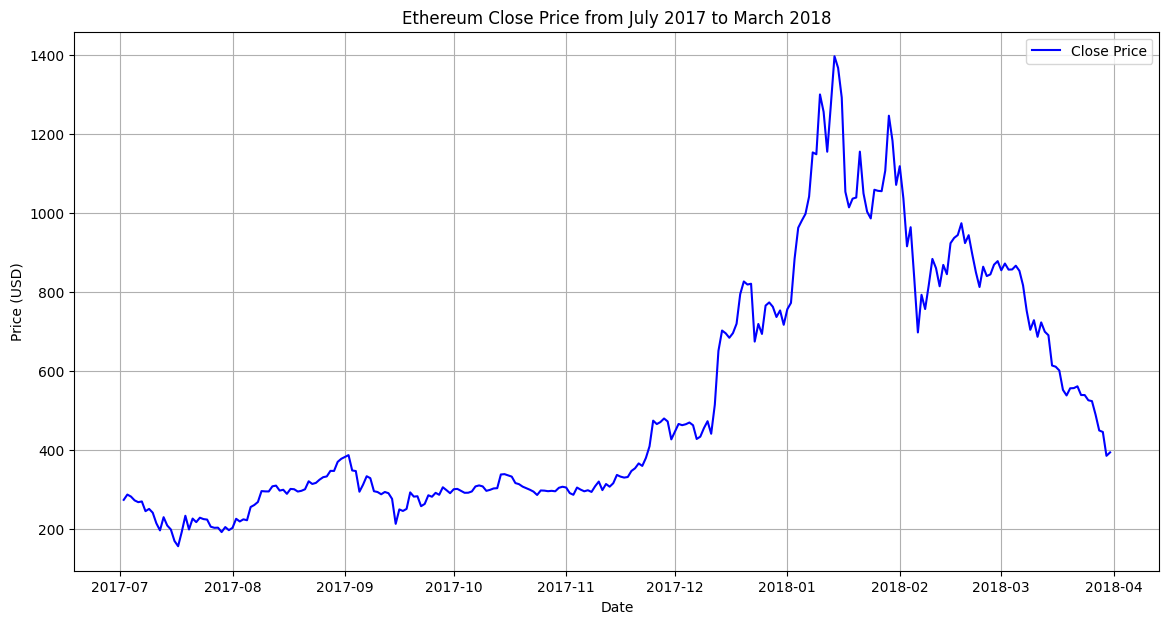

In [43]:
# Close Price Chart for the Selected Period
plt.figure(figsize=(14, 7))
plt.plot(filtered_data1['Date'], filtered_data1['Close'], color='blue', label='Close Price')
plt.title('Ethereum Close Price from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

<font color = "Orange">

<a id = "41"></a><br>
### Volatility Analysis in the Selected Period

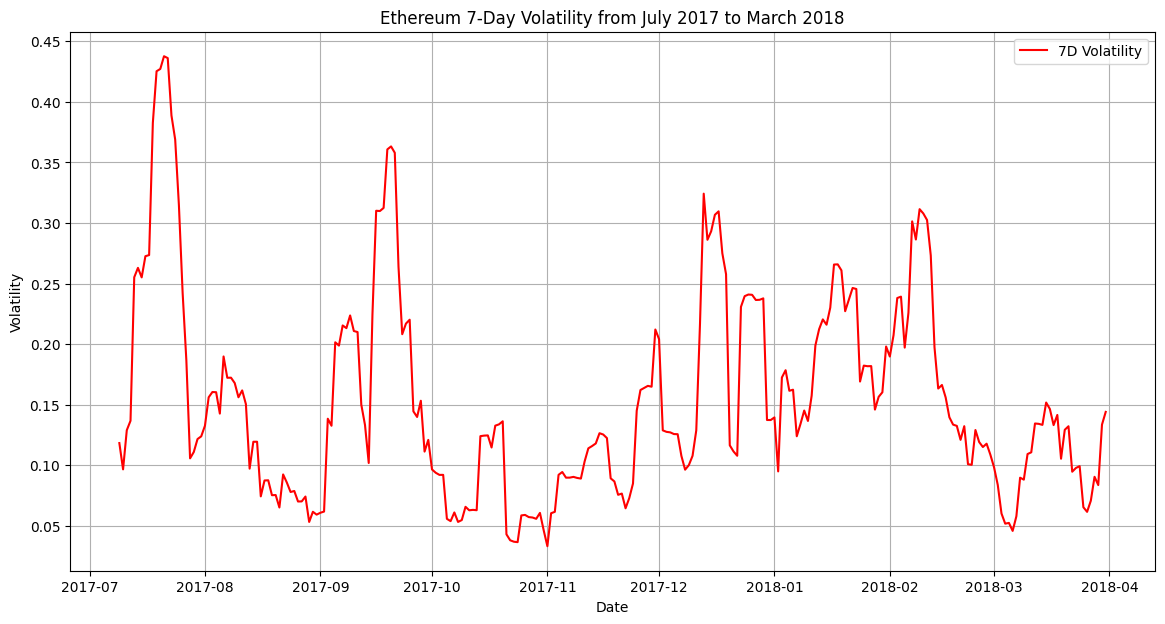

In [44]:
# Calculating 7-Day Rolling Volatility
filtered_data1.loc[:, '7D Volatility'] = filtered_data1['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)


# Volatility Graph
plt.figure(figsize=(14, 7))
plt.plot(filtered_data1['Date'], filtered_data1['7D Volatility'], color='red', label='7D Volatility')
plt.title('Ethereum 7-Day Volatility from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

<font color = "Orange">

<a id = "42"></a><br>
### Price and Volatility Relationship in the Selected Period

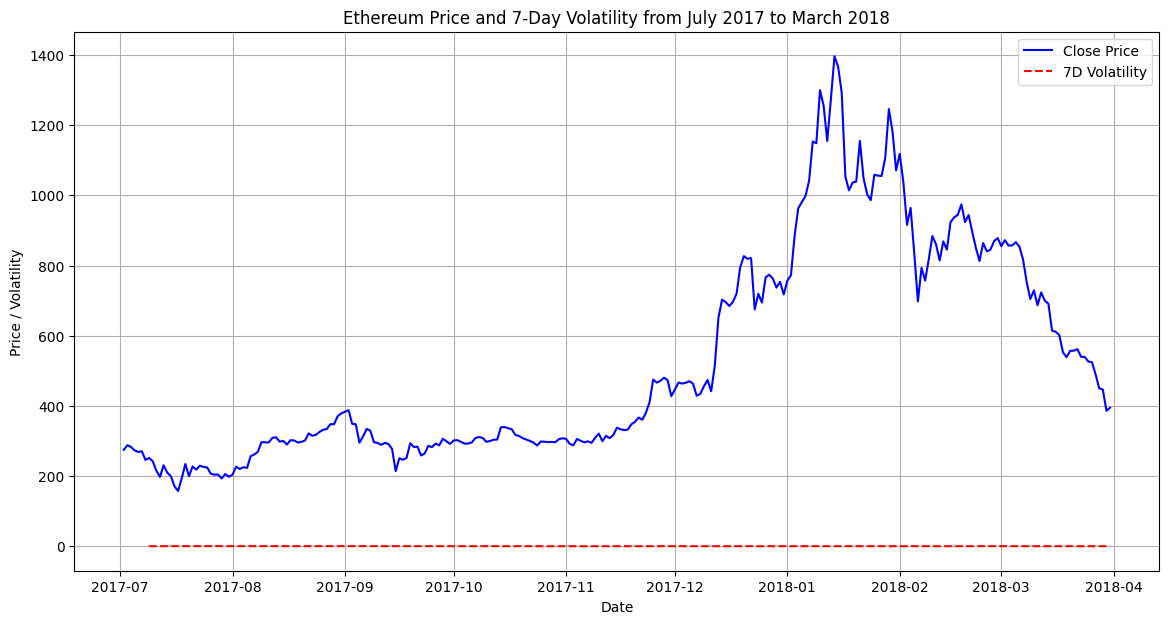

In [45]:
# Price and Volatility Chart
plt.figure(figsize=(14, 7))
plt.plot(filtered_data1['Date'], filtered_data1['Close'], color='blue', label='Close Price')
plt.plot(filtered_data1['Date'], filtered_data1['7D Volatility'], color='red', label='7D Volatility', linestyle='--')
plt.title('Ethereum Price and 7-Day Volatility from July 2017 to March 2018')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.grid(True)
plt.legend()
plt.show()
